# In this notebook, we will try to improve the accuracy by taking a different approach

In [1]:
# import required libraries
import numpy as np
import os, sys
import torch

# neural network modules
import torch.nn as nn
# PyTorch utilities
from torch.utils.data import DataLoader
# optimizers
import torch.optim as optim

# using functions written in 1st notebook instead of rewriting them again and again
# the functions are made into a module named `utilities` in the `src` directory 
import importlib
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)
from src import utilities
from src.utilities import train_model, evaluate, plot_metrics, prediction_and_image, load_mnist_data
importlib.reload(utilities)

<module 'src.utilities' from '/home/ravi/Desktop/deep-learning-projects/mnist-cnn/src/utilities.py'>

In [11]:
# set device to cuda(gpu)
if torch.cuda.is_available:
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

device

device(type='cuda')

In [12]:
# load dataset
train_dataset, test_dataset = load_mnist_data()

### Build a CNN Model

1. Two Convolution Layers
2. Two Max Pooling Layers
3. One Fully Connected Linear Layer
![alt text](../images-for-notebooks/cnn_deep.png)

In [14]:
class CNN1(nn.Module):
    def __init__(self):
        super(CNN1, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1,out_channels=24,kernel_size=3)
        self.pool1 = nn.MaxPool2d(kernel_size=2)

        self.conv2 = nn.Conv2d(in_channels=24,out_channels=48,kernel_size=3)
        self.pool2 = nn.MaxPool2d(kernel_size=2)
        
        self.flatten = nn.Flatten()
        self.fc_linear = nn.Linear(in_features=48*5*5, out_features=10)
        self.relu = nn.ReLU()
    
    def forward(self,X):
        X = self.conv1(X)
        X = self.relu(X)
        X = self.pool1(X)

        X = self.conv2(X)
        X = self.relu(X)
        X = self.pool2(X)

        X = self.flatten(X)
        X = self.fc_linear(X)
        return X

In [ ]:
# instantiate the model and move to device
cnn_model_1 = CNN1().to(device)

# define batch size, dataloader, optimizer, and loss functions

# batch size
BATCHSIZE1 = 64
# dataloader
trainset_loader1 = DataLoader(train_dataset, BATCHSIZE1, shuffle=True)
testset_loader1 = DataLoader(test_dataset, BATCHSIZE1, shuffle=False)

# loss function (Cost Function)
loss_function = torch.nn.CrossEntropyLoss()

# optimizer - starting with the simplest one and with default learning rate
optimizer1 = optim.SGD(cnn_model_1.parameters())

EPOCHS = 20

# train the model
losses1, accuracies1 = train_model(cnn_model_1, trainset_loader1, loss_function, optimizer1, EPOCHS)

EPOCH: 1...
EPOCH: 2...
EPOCH: 3...
EPOCH: 4...
EPOCH: 5...
EPOCH: 6...
EPOCH: 7...
EPOCH: 8...
EPOCH: 9...
EPOCH: 10...
EPOCH: 11...
EPOCH: 12...
EPOCH: 13...
EPOCH: 14...
EPOCH: 15...
EPOCH: 16...
EPOCH: 17...
EPOCH: 18...
EPOCH: 19...
EPOCH: 20...


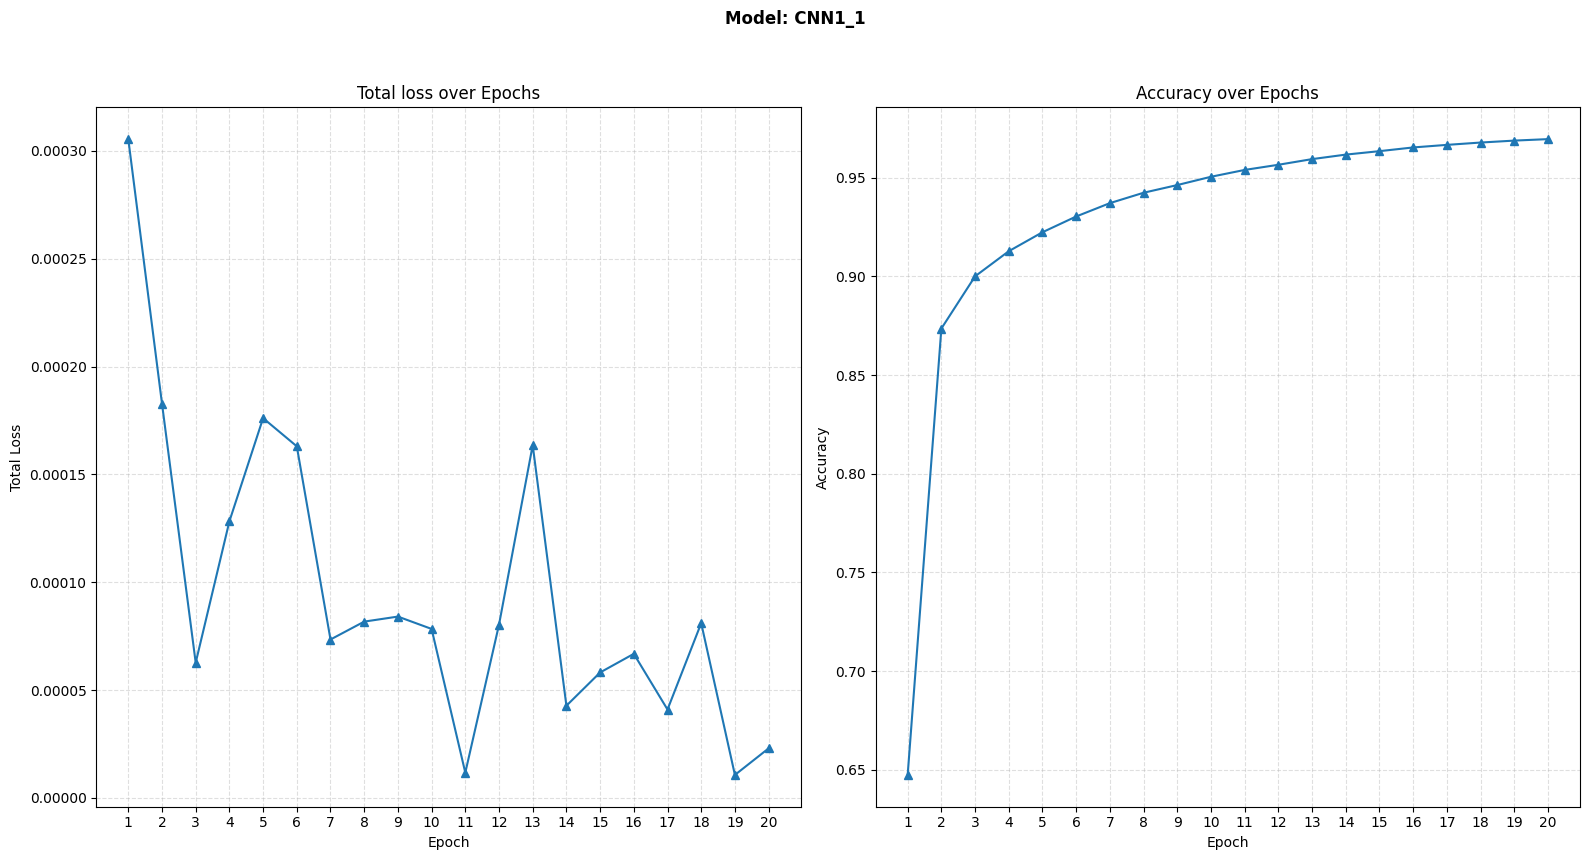

In [20]:
plot_metrics(losses1, accuracies1, "CNN1_1")

### Defining a function to print out the training and testing results

In [33]:
test_loss, test_accuracy = evaluate(cnn_model_1, testset_loader1, loss_function)

In [23]:
# print the results
def print_conclusion(model_name, losses, accuracies, test_loss, test_accuracy):
    print(f"Model: {model_name}")
    print(f"Loss(Training): {losses[-1]:.6f}")
    print(f"Accuracy(Training): {accuracies[-1]:.6f}")
    print(f"Loss(Testing): {test_loss:.6f}")
    print(f"Accuracy(Testing): {test_accuracy:.6f}")

In [34]:
print_conclusion("CNN1", losses1, accuracies1, test_loss, test_accuracy)

Model: CNN1
Loss(Training): 0.000023
Accuracy(Training): 0.969617
Loss(Testing): 0.000010
Accuracy(Testing): 0.972300


We just added a layer of convolution and maxpooling, accuracy increased from 95% to 96% (well not a huge jump in accuracy, but still improvement is an imporvement)
### Save this as checkpoint

In [26]:
# add a check point for future reference
from pathlib import Path

CHECKPOINT = Path("../checkpoints")
CHECKPOINT.mkdir(parents=True, exist_ok=True)

CHECKPOINT_NAME = "CNN1_1.pt"
CHECKPOINT_PATH = CHECKPOINT/CHECKPOINT_NAME

state = {
        'epochs' : EPOCHS,
        'model_state_dict': cnn_model_1.state_dict(),
        'optimizer_state_dict': cnn_model_1.state_dict(),
        'losses': losses1,
        'accuracies': accuracies1,
        'batch_size': BATCHSIZE1,
        'learning_rate': 0.01
    }
torch.save(state, CHECKPOINT_PATH)
print(f"Model saved successfully to {CHECKPOINT_PATH}")

Model saved successfully to ../checkpoints/CNN1_1.pt


### Experimenting 
Let's test Adam optimizer for the same CNN model

In [27]:
# Checking if accuracy imporves by using different optimization technique
# optimizer - starting with the simplest one and with default learning rate
# instantiate the model and move to device
cnn_model_2 = CNN1().to(device)

# define batch size, dataloader, optimizer, and loss functions
# using same batch size

# loss function (Cost Function)
loss_function = torch.nn.CrossEntropyLoss()

# move to Adam optimizer with default learning rate
optimizer2 = optim.Adam(cnn_model_2.parameters())

EPOCHS = 20

# train this model
losses2, accuracies2 = train_model(cnn_model_2, trainset_loader1, loss_function, optimizer2, EPOCHS)

EPOCH: 1...
EPOCH: 2...
EPOCH: 3...
EPOCH: 4...
EPOCH: 5...
EPOCH: 6...
EPOCH: 7...
EPOCH: 8...
EPOCH: 9...
EPOCH: 10...
EPOCH: 11...
EPOCH: 12...
EPOCH: 13...
EPOCH: 14...
EPOCH: 15...
EPOCH: 16...
EPOCH: 17...
EPOCH: 18...
EPOCH: 19...
EPOCH: 20...


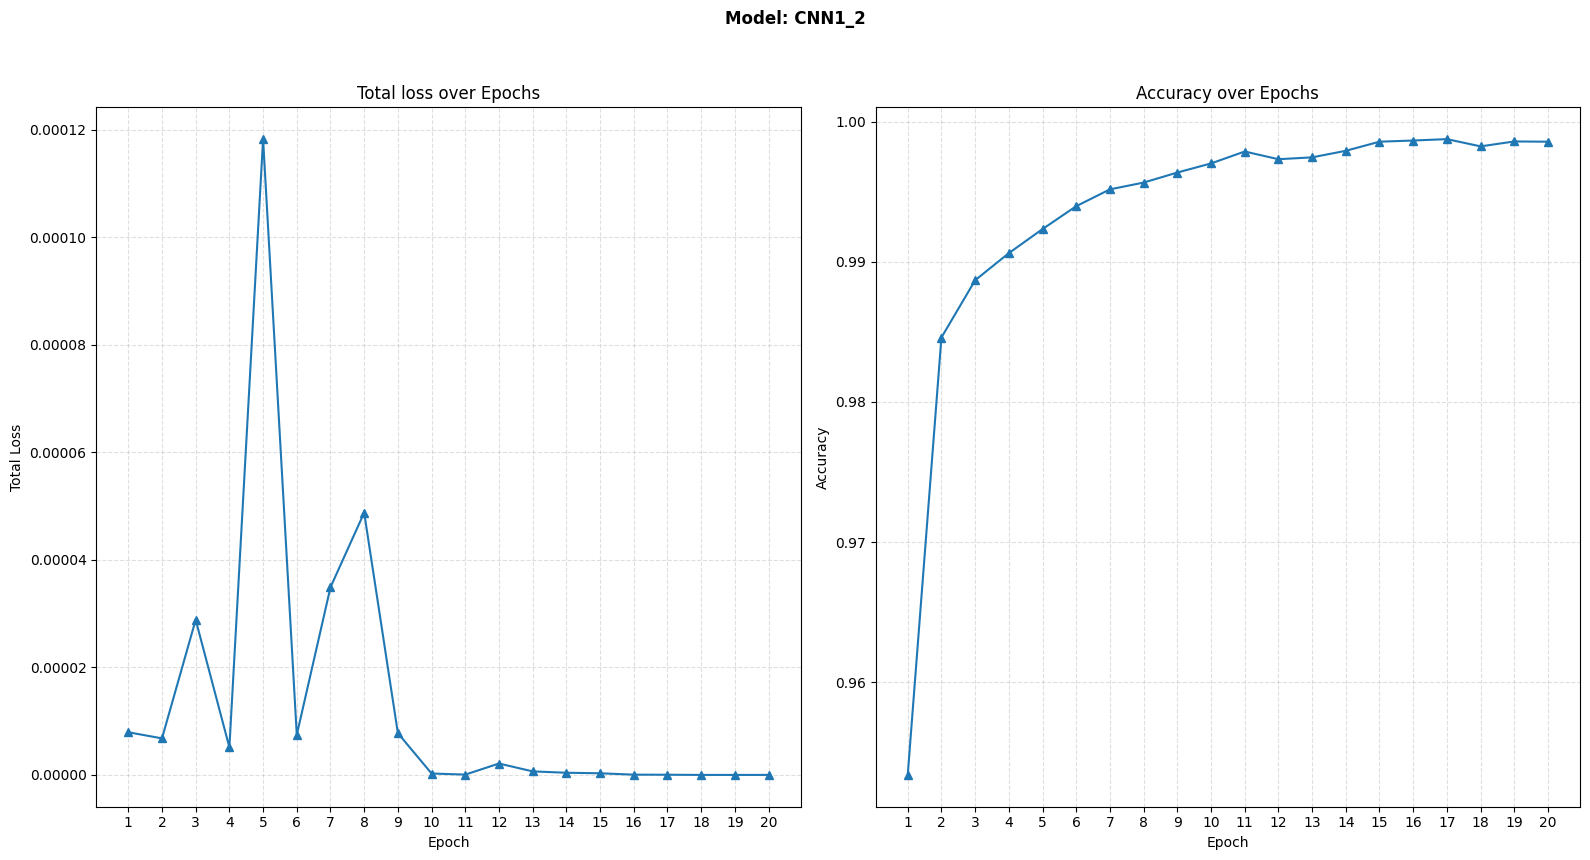

In [29]:
plot_metrics(losses2, accuracies2, "CNN1_2")

In [30]:
# Evaluate the model with test set
test_loss2, test_accuracy2 = evaluate(cnn_model_2, testset_loader1, loss_function)

print_conclusion("CNN2", losses2, accuracies2, test_loss2, test_accuracy2)

Model: CNN2
Loss(Training): 0.000000
Accuracy(Training): 0.998567
Loss(Testing): 0.000005
Accuracy(Testing): 0.990500


We see that the accuracy has significantly imporved, a deeper layer and Adam Optimizer boosted our model accuracy.
### Save this as checkpoint

In [31]:
CHECKPOINT_NAME = "CNN1_2.pt"
CHECKPOINT_PATH = CHECKPOINT/CHECKPOINT_NAME

state = {
        'epochs' : EPOCHS,
        'model_state_dict': cnn_model_1.state_dict(),
        'optimizer_state_dict': cnn_model_1.state_dict(),
        'losses': losses1,
        'accuracies': accuracies1,
        'batch_size': BATCHSIZE1,
        'learning_rate': 0.01
    }
torch.save(state, CHECKPOINT_PATH)
print(f"Model saved successfully to {CHECKPOINT_PATH}")

Model saved successfully to ../checkpoints/CNN1_2.pt
